In [14]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load your sales data
OrderData = pd.read_csv('C:/Users/wasim/OneDrive/Desktop/MySQL/Data Analysis/AceOrders2324.csv')

print(OrderData.head())

   Order Number Order Status        Order Date First Name (Billing)  \
0         14132   Processing  2024-09-30 18:13            Christine   
1         14131   Processing  2024-09-30 17:58              Jessica   
2         14119   Processing  2024-09-30 15:22               Dessie   
3         14075   Processing  2024-09-29 02:42                  Joy   
4         14073   Processing  2024-09-28 15:50              allyssa   

  Last Name (Billing)             Company (Billing)  \
0             Sanchez  Sanchez Here Productions LLC   
1              Mobley           DESIGN 2 WEAR 2 LLC   
2               Coder                Cheer Bows Etc   
3              Ridley                 J&J Creations   
4              Travis                           NaN   

             Address 1&2 (Billing) City (Billing) State Code (Billing)  \
0                 5150 Marton Road      Ann Arbor                   MI   
1                 1112 Central Ave     Middletown                   OH   
2  400 Colemans Cros

In [3]:
# Convert 'Order Date' to datetime
OrderData['Order Date'] = pd.to_datetime(OrderData['Order Date'])

In [4]:
# Extract year, month, and week
OrderData['Year'] = OrderData['Order Date'].dt.year
OrderData['Month'] = OrderData['Order Date'].dt.month
OrderData['Week'] = OrderData['Order Date'].dt.isocalendar().week


In [5]:
# Filter sales for 2023 and 2024
sales_2023 = OrderData[OrderData['Year'] == 2023]
sales_2024 = OrderData[OrderData['Year'] == 2024]

# Calculate total sales
total_sales_2023 = sales_2023['Order Total Amount'].sum()
total_sales_2024 = sales_2024['Order Total Amount'].sum()

print("Total Sales 2023:", total_sales_2023)
print("Total Sales 2024:", total_sales_2024)

Total Sales 2023: 46696.74
Total Sales 2024: 85135.29000000001


In [6]:
monthly_sales_2023 = sales_2023.groupby('Month')['Order Total Amount'].sum()
monthly_sales_2024 = sales_2024.groupby('Month')['Order Total Amount'].sum()

print("Monthly Sales 2023:\n", monthly_sales_2023)
print("Monthly Sales 2024:\n", monthly_sales_2024)


Monthly Sales 2023:
 Month
7      5358.34
8     13456.52
9      7733.91
10     9254.18
11     6900.46
12     3993.33
Name: Order Total Amount, dtype: float64
Monthly Sales 2024:
 Month
1     5991.14
2     6680.06
3     6282.87
4    12702.70
5     8690.01
6    11099.56
7     8809.39
8    12848.59
9    12030.97
Name: Order Total Amount, dtype: float64


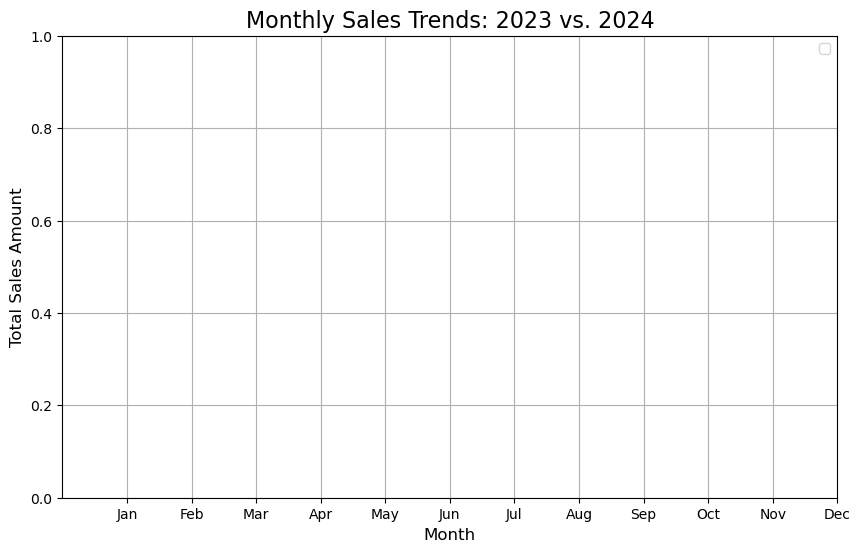

In [18]:
# Group data by year and month for sales trends
monthly_sales = OrderData.groupby(['Year', 'Month'])['Order Total Amount'].sum().unstack(level=0)

# Plotting the line chart
plt.figure(figsize=(10,6))
sns.lineplot(OrderData=monthly_sales)
plt.title('Monthly Sales Trends: 2023 vs. 2024', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales Amount', fontsize=12)
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(['2023', '2024'])
plt.grid(True)
plt.show()


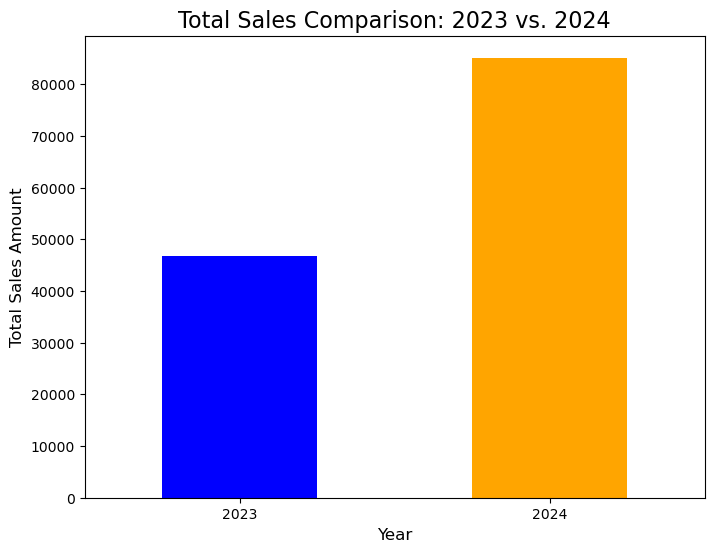

In [20]:
# Calculate total sales per year
total_sales_per_year = OrderData.groupby('Year')['Order Total Amount'].sum()

# Plotting the bar chart
plt.figure(figsize=(8,6))
total_sales_per_year.plot(kind='bar', color=['blue', 'orange'])
plt.title('Total Sales Comparison: 2023 vs. 2024', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales Amount', fontsize=12)
plt.xticks(rotation=0)
plt.show()


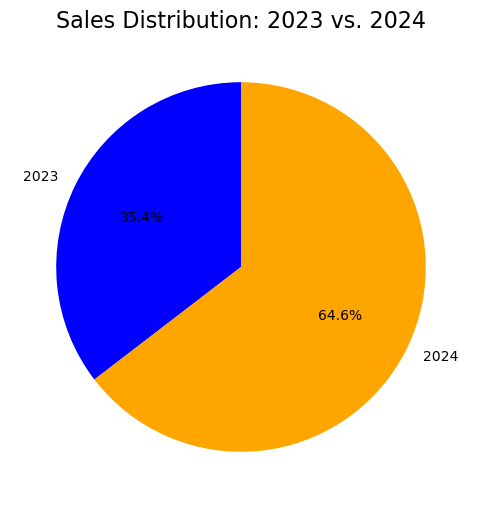

In [22]:
# Plotting the pie chart
plt.figure(figsize=(6,6))
plt.pie(total_sales_per_year, labels=total_sales_per_year.index, autopct='%1.1f%%', colors=['blue', 'orange'], startangle=90)
plt.title('Sales Distribution: 2023 vs. 2024', fontsize=16)
plt.show()


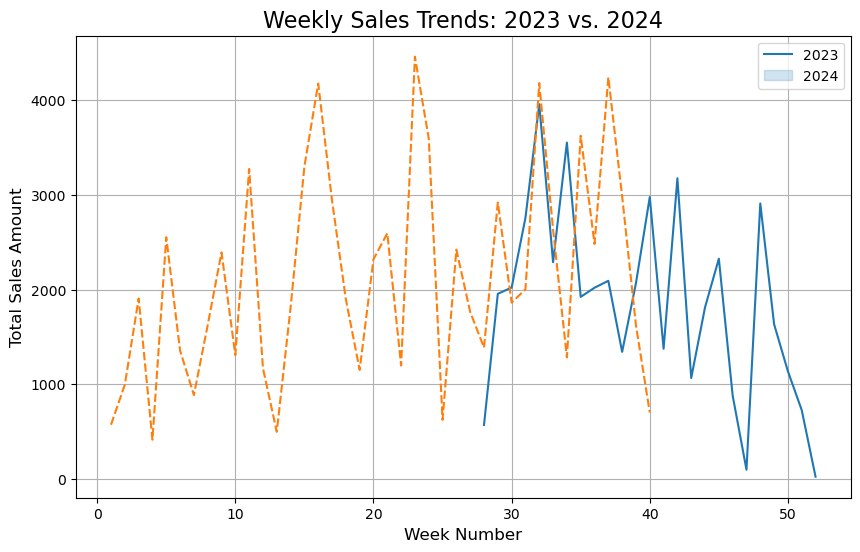

In [24]:
# Group data by year and week for sales trends
weekly_sales = OrderData.groupby(['Year', 'Week'])['Order Total Amount'].sum().unstack(level=0)

# Plotting the line chart for weekly sales
plt.figure(figsize=(10,6))
sns.lineplot(data=weekly_sales)
plt.title('Weekly Sales Trends: 2023 vs. 2024', fontsize=16)
plt.xlabel('Week Number', fontsize=12)
plt.ylabel('Total Sales Amount', fontsize=12)
plt.legend(['2023', '2024'])
plt.grid(True)
plt.show()


In [ ]:
# Group data by year and week for sales trends
weekly_sales = OrderData.groupby(['Year', 'Week'])['Order Total Amount'].sum().unstack(level=0)

# Plotting the line chart for weekly sales
plt.figure(figsize=(10,6))
sns.lineplot(data=weekly_sales)
plt.title('Weekly Sales Trends: 2023 vs. 2024', fontsize=16)
plt.xlabel('Week Number', fontsize=12)
plt.ylabel('Total Sales Amount', fontsize=12)
plt.legend(['2023', '2024'])
plt.grid(True)
plt.show()
